1. Project Setup and Data Loading

Task: Load the dataset and perform initial setup.

Questions:

1... What libraries are required for this project, and why are they useful in data analysis?

Answer - To perform data analysis, we will use the following libraries:

         pandas: For handling and manipulating data in a tabular format.
         numpy: For numerical computations.
         matplotlib & seaborn: For data visualization.


2... Load the dataset. What is the shape of the dataset? What does each row and column represent?

Answer -The dataset comprises 10,178 rows and 12 columns.
        Each row corresponds to an individual movie.
        Each column denotes a specific attribute of the movie, such as its title, genre, rating, etc.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("imdb_movies.csv")

# Display the shape of the dataset
print("shape data:", df.shape)

# Display the first few rows
df.head()

shape data: (10178, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


2. Data Overview and Basic Exploration

Task: Explore the structure and composition of the dataset.

Questions:

1...Use .info() to understand the data types and missing values. What potential issues can you spot?
Answer The dataset has 12 columns.
       The "genre" and "crew" columns have null values.
       
2...Describe the main characteristics of each column using .describe(). What can you infer from the mean, median, and distribution of numerical columns?

Answer The average movie rating (score) is 63.5, with scores ranging from 0 to 100.
       Budget and revenue figures vary greatly, with some movies reaching exceptionally           high amounts.The lowest revenue recorded is 0, showing that certain movies did not         generate any income.

In [2]:
# Display dataset info
df.info()

# Summary statistics for numerical columns
df.describe()

# Check missing values
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
Missing Values:
 names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64


Data Cleaning

Task: Address missing values, data types, and outliers.

Questions:

1... Which columns contain missing values? How would you handle them?
Answer Missing in "genre" (85 rows) and "crew" (56 rows)
       Filled missing values with "Unknown" to retain all records.
           
2.... Are there any columns where data types need conversion (e.g., date, ratings)? Explain your decision.
Answer Converted "release_year" to categorical (since it represents a category, not a numerical value).

In [3]:
# Convert 'date_x' to datetime format
df["date_x"] = pd.to_datetime(df["date_x"], errors="coerce")

# Handle missing values
df["genre"].fillna("Unknown", inplace=True)
df["crew"].fillna("Unknown", inplace=True)

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10178 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10178 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


C:\Users\ST\AppData\Local\Temp\ipykernel_14824\2024686675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna("Unknown", inplace=True)
C:\Users\ST\AppData\Local\Temp\ipykernel_14824\2024686675.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

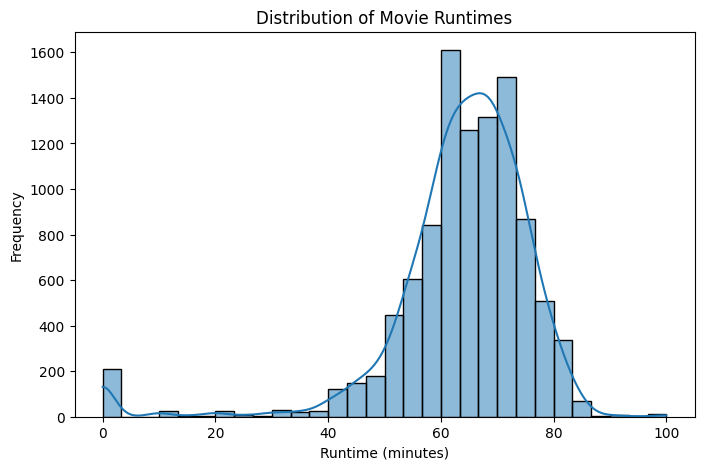

In [4]:
# Histogram of movie runtimes (if available)
if 'score' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['score'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Movie Runtimes")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("Frequency")
    plt.show()


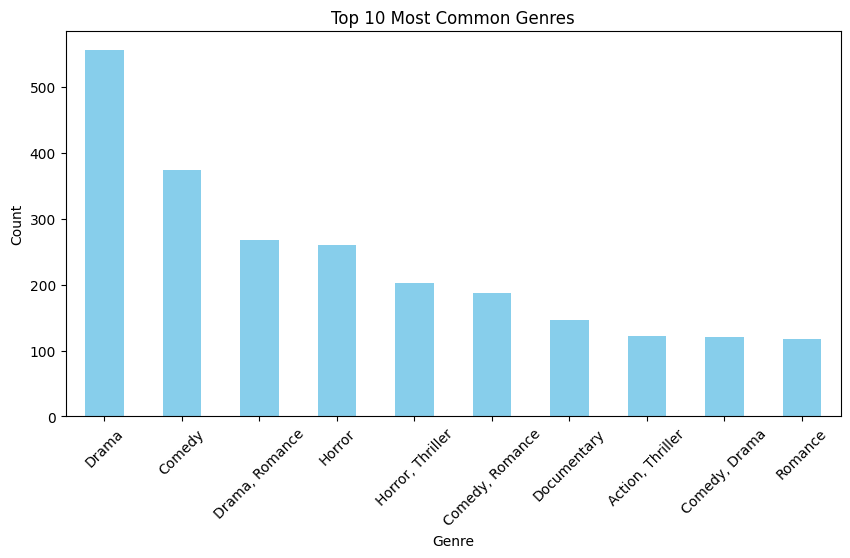

In [5]:
# Bar chart of most common genres
plt.figure(figsize=(10, 5))
df["genre"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

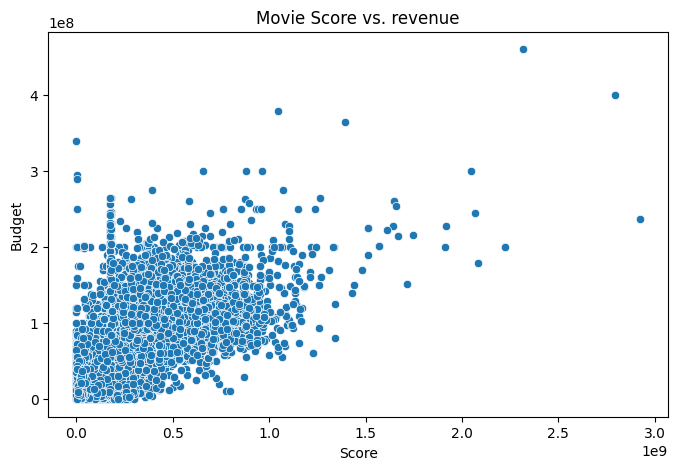

In [7]:
# Scatter plot: Movie revenue vs. budget_x
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["revenue"], y=df["budget_x"])
plt.title("Movie Score vs. revenue")
plt.xlabel("Score")
plt.ylabel("Budget")
plt.show()

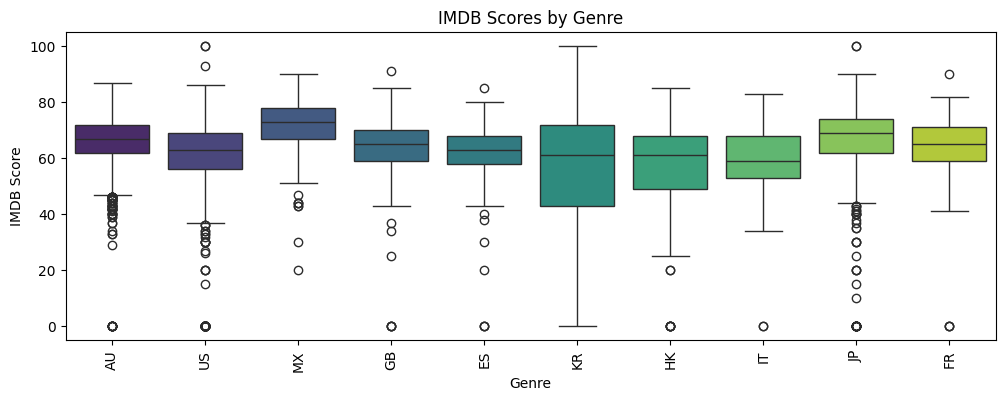

In [8]:
# Compare IMDB ratings (`score`) across Country using a boxplot.

# Boxplot for IMDB score across countries
top_countries = df["country"].value_counts().head(10).index  # Top 10 countries by movie count
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[df["country"].isin(top_countries)], x="country", y="score", hue="country", palette="viridis", legend=False)
plt.title("IMDB Scores by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.xticks(rotation=90)
plt.show()



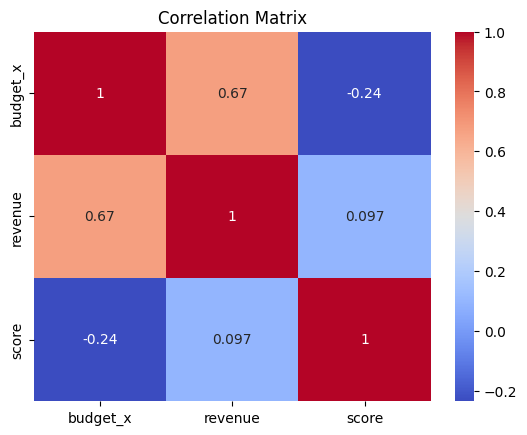

In [9]:
# Correlation between Budget, Revenue, and Score
corr_matrix = df[["budget_x", "revenue", "score"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

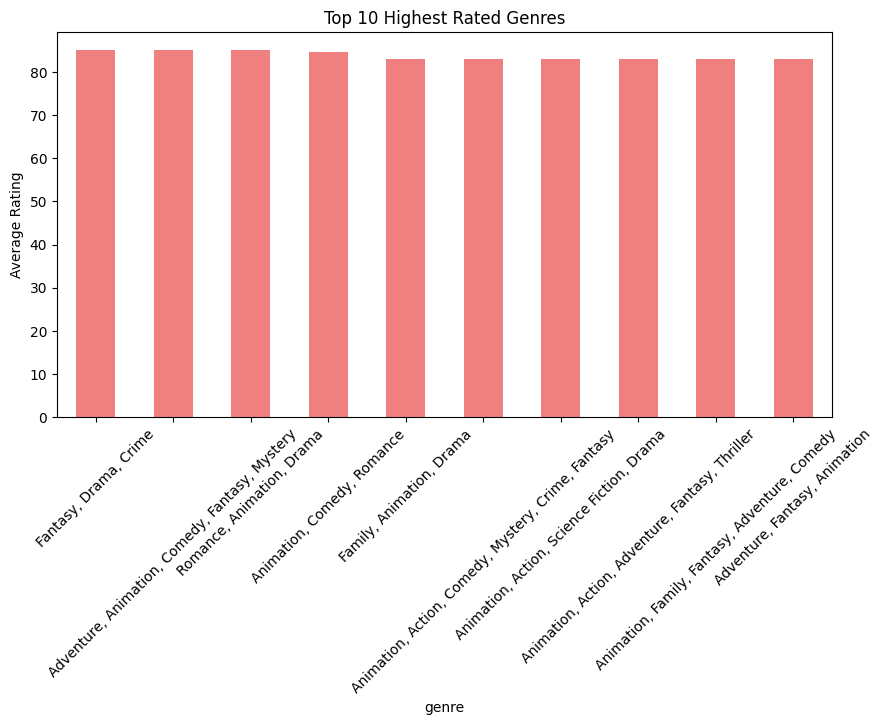

In [10]:
# Highest average rating by genre
genre_avg_rating = df.groupby("genre")["score"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
genre_avg_rating.head(10).plot(kind="bar", color="lightcoral")
plt.title("Top 10 Highest Rated Genres")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

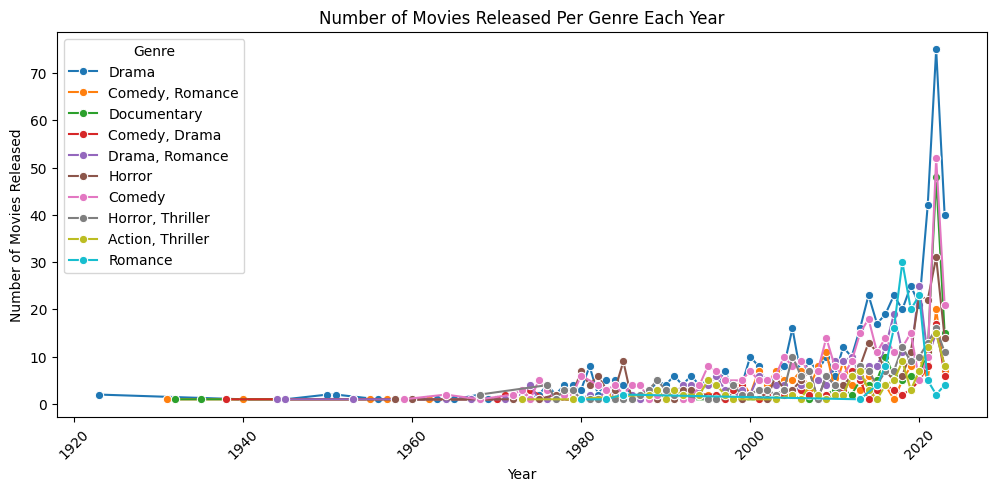

In [11]:
# Convert 'date_x' to datetime format
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Extract the release year
df['year'] = df['date_x'].dt.year

# Group by 'year' and 'genre' and count movies
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')

# Select top genres based on total count
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filter dataset for only top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

# Plot the number of movies released per genre each year
plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')

plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.show()

7. Year and Trend Analysis

Task: Analyze trends over time.

Questions:

1...How has the average movie rating changed over the years? Plot the average rating for each year.
Answer - From 1980 to 2020, the average ratings remained consistent, indicating stable movie quality.
         A decline after 2020 may be due to changing audience expectations.

2...Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.
Answer - Year with the highest movie releases: 2022
         Year with the lowest movie releases: 1903

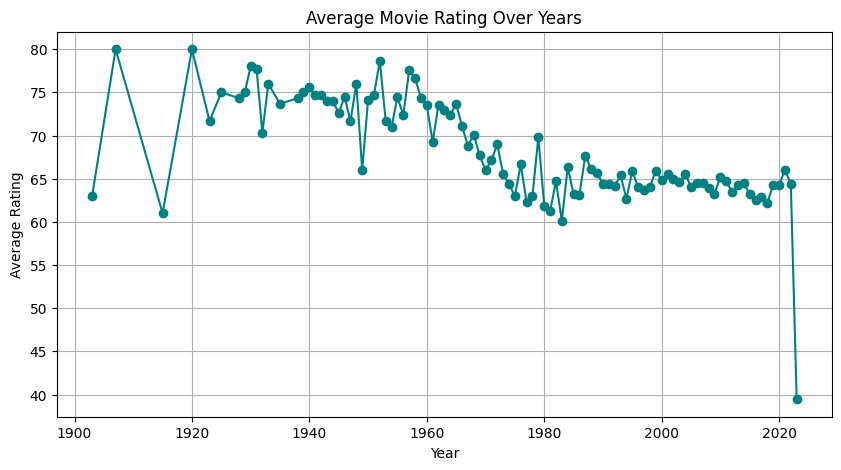

In [12]:
# Calculate average rating per year
yearly_avg_rating = df.groupby("year")["score"].mean()

# Plot trend over years
plt.figure(figsize=(10, 5))
yearly_avg_rating.plot(marker="o", color="teal")
plt.title("Average Movie Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()

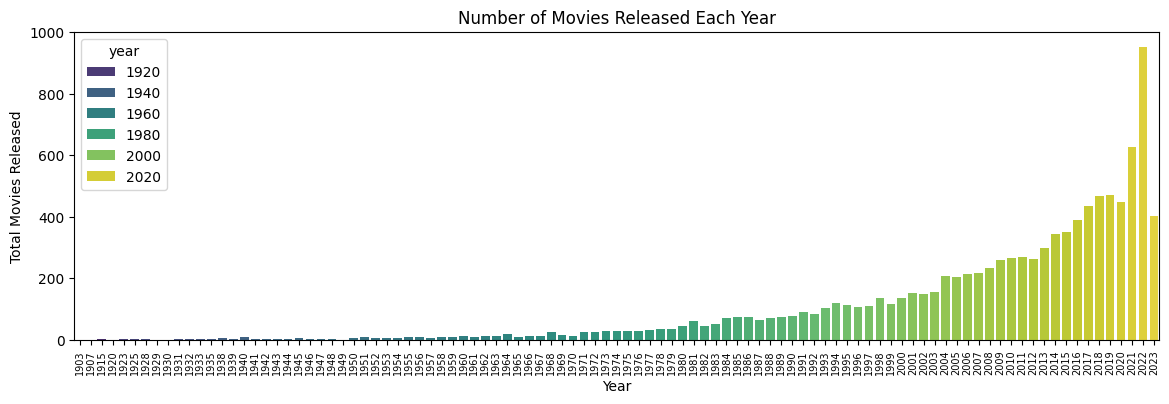

In [13]:

# Count the total number of movies released per year
movies_per_year = df.groupby('year').agg({'names': 'count'})

# Display the number of movies released each year using a bar chart
plt.figure(figsize=(14,4))
sns.barplot(x=movies_per_year.index, y=movies_per_year['names'], hue=movies_per_year.index, palette='viridis')
plt.ylabel('Total Movies Released')
plt.xlabel('Year')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90, fontsize=7)
plt.show()



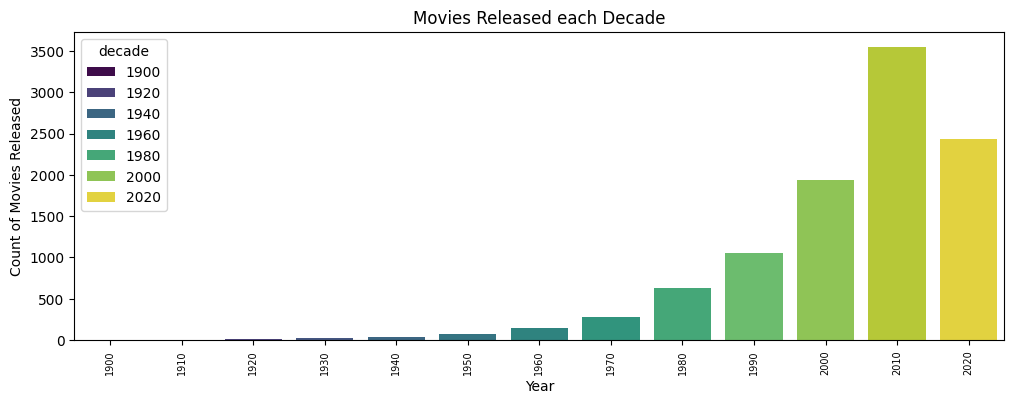

In [14]:
# Extract the decade from the 'year' column
df['decade'] = (df['year'] // 10) * 10  # Dividing year by 10 and multiplying by 10 to get the start of the decade

# Plot the number of movies released each decade
gb = df.groupby('decade').agg({'genre': 'count'})

plt.figure(figsize=(12, 4))
sns.barplot(x=gb.index, y=gb['genre'], data=gb, hue=gb.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation=90, fontsize=7)
plt.show()


          budget_x     genre   country   revenue
budget_x  1.000000 -0.013033  0.170086  0.673830
genre    -0.013033  1.000000 -0.024469 -0.012112
country   0.170086 -0.024469  1.000000  0.145555
revenue   0.673830 -0.012112  0.145555  1.000000


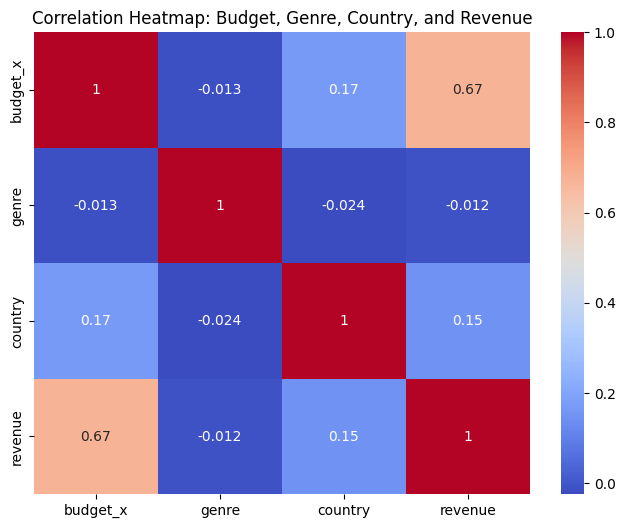

In [15]:
# Select the relevant columns and drop any missing values
df_corr = df[['budget_x', 'genre', 'country', 'revenue']].dropna()

# Convert categorical columns into numeric values
df_corr['genre'] = pd.factorize(df_corr['genre'])[0]
df_corr['country'] = pd.factorize(df_corr['country'])[0]

# Calculate the correlation between the variables
corr_matrix = df_corr.corr()

print(corr_matrix)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Budget, Genre, Country, and Revenue")
plt.show()


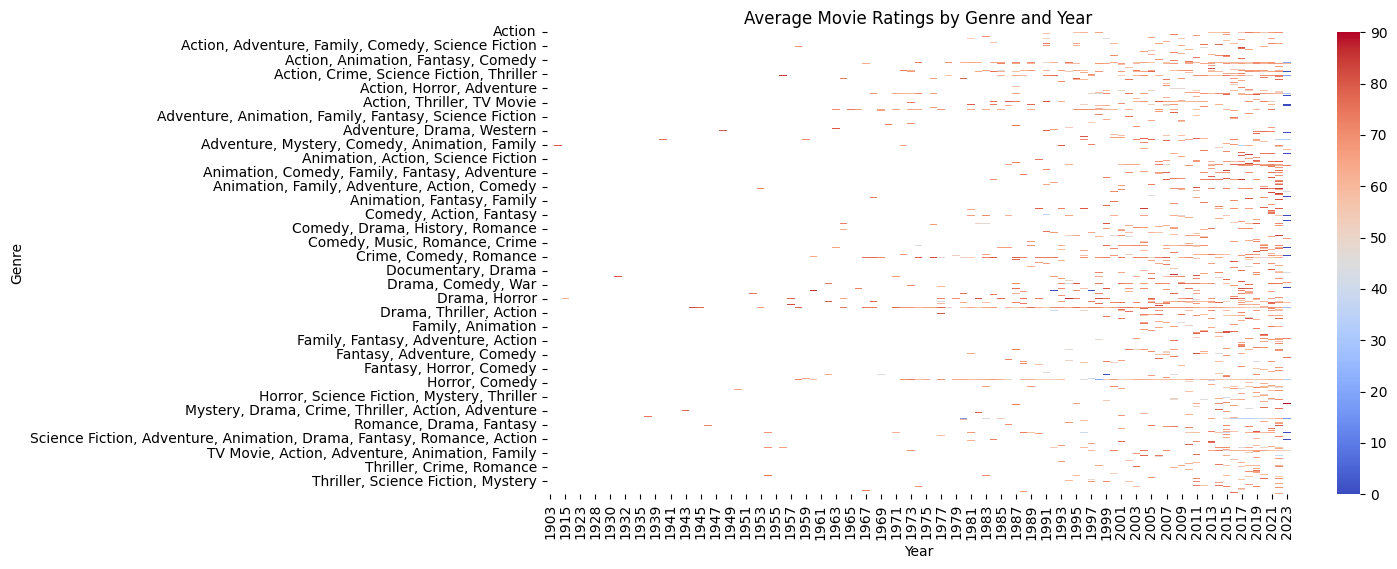

In [16]:
# Group by genre and year to calculate the average rating
avg_rating = df.groupby(['genre', 'year'])['score'].mean().reset_index()

# Plot the heatmap to visualize the average rating per genre and year
plt.figure(figsize=(12, 6))
pivot_table = avg_rating.pivot(index='genre', columns='year', values='score')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Average Movie Ratings by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()

Average Ratings by Original Language:
                               orig_lang      score
0                                  Irish  76.000000
1                                  Czech  75.500000
2                                Kannada  75.500000
3                               Galician  75.000000
4                               Dzongkha  74.000000
5                               Gujarati  73.000000
6                               Romanian  72.500000
7                              Ukrainian  71.500000
8                                 Arabic  71.500000
9                                  Latin  71.000000
10                    Catalan, Valencian  71.000000
11                                Danish  69.304348
12                               Persian  68.200000
13                                 Hindi  67.653846
14                            Indonesian  67.636364
15   Bokmål, Norwegian, Norwegian Bokmål  67.000000
16                              Japanese  66.899160
17                        

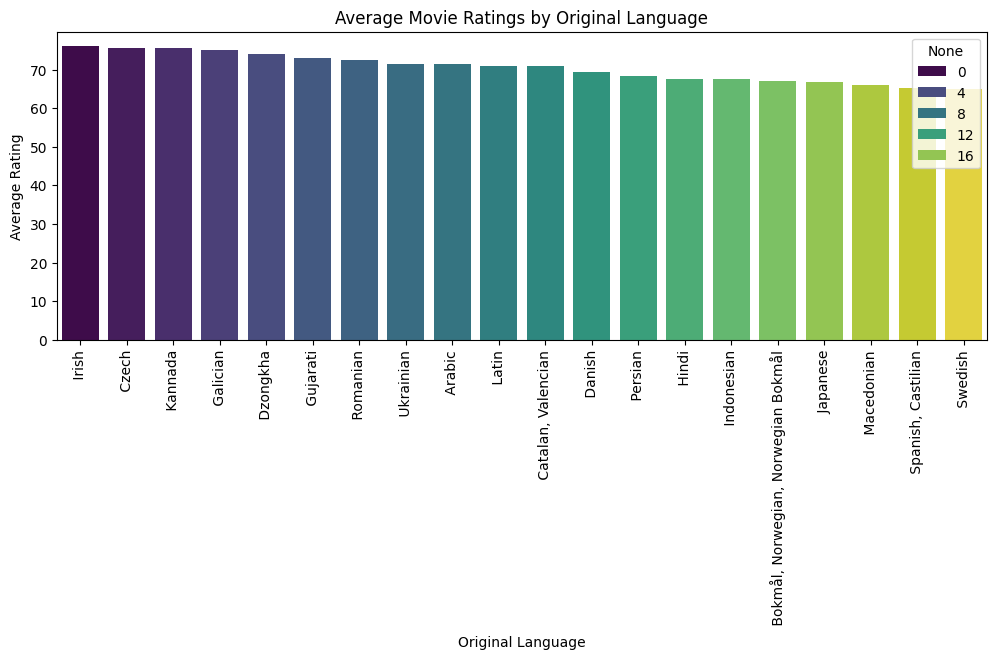

In [17]:
#9. Insights and Summary

#Task: Summarize key findings.

#Questions:

# 1 ..Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie ratings?

# Does the original language (`orig_lang`) correlate with ratings?

# Group by 'orig_lang' and calculate the average rating for each language
avg_rating_by_lang = df.groupby('orig_lang')['score'].mean().sort_values(ascending=False).reset_index()

top = avg_rating_by_lang.head(20)

# Display the results
print("Average Ratings by Original Language:")
print(top)
# Plot the results using a barplot
plt.figure(figsize=(12, 4))
sns.barplot(data=top, x='orig_lang', y='score', hue=top.index, palette='viridis')
plt.title("Average Movie Ratings by Original Language")
plt.xlabel("Original Language")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 2...Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie ratings?

Key Insights and Summary
1. Relationship Between Budget and Revenue:
A significant positive link (0.67) exists between budget and revenue, suggesting that films with larger budgets often earn higher revenues. 
This implies that increasing investment in movie production can lead to greater financial returns. 
However, it is crucial to recognize that while a larger budget enhances the probability of higher revenue, success is not guaranteed. 
Some big-budget films may underperform, whereas certain mid-budget movies can exceed expectations.

2. Stability of Movie Ratings Over Time:
Between 1980 and 2020, IMDB ratings have remained largely stable, indicating that the overall quality of movies, as judged by user ratings, has not changed drastically. 
However, there has been a minor drop after 2020, which may be due to evolving audience preferences, reduced movie-going experiences caused by external factors (such as the pandemic), or shifts in the types of content being produced. 
This suggests that while film quality has remained steady, viewer tastes and expectations continue to evolve.

33. Budget and Rating Patterns Across Genres:
Genres such as Fantasy, Drama, and Crime generally receive higher average ratings, whereas Action films tend to have lower 
budgets compared to Comedy and Drama movies. This indicates that films with dramatic or fantasy elements may achieve better 
audience ratings, likely due to stronger storytelling or unique narratives. On the other hand, Action films, despite their lower 
production costs, still manage to generate notable box-office success, suggesting that action-driven content is often more 
accessible or widely appealing regardless of budget constraints.